In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


os.chdir("/home/g.esposito/AlternativeModels-SC2/Per_convolution_FSIM_AdaptiveClipperLeNet5")
# /home/g.esposito/AlternativeModels-SC2/FSIM_AdaptiveClipperLeNet5
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/g.esposito/AlternativeModels-SC2/Per_convolution_FSIM_AdaptiveClipperLeNet5/") if file_path.startswith("JOBID0_W")]
# print(log_folders)

AC_general_report = pd.DataFrame([])
new_report = pd.DataFrame([])
AC_general_missclassified_report = pd.DataFrame([])
for ber_conf in log_folders:
    if ber_conf != ".DS_Store":
        folder_path = os.path.join(path,  ber_conf)
        print(folder_path)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log') and not files == '_ber_0.0006']:
            print(cnf)
            file_path = os.path.join(folder_path, cnf)

            report_path = os.path.join(file_path, "fsim_report.csv")
            report = pd.read_csv(report_path)
            report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

            report.drop(columns=['Unnamed: 0'], inplace=True)
            # report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
            
            report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
            report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
            report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
            report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

            report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
            report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
            report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
            report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

            report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
            report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
            report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
            report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

            report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
            report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
            report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
            report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
            # report['trial'] = float(cnf.split('_')[-1])

            missclassified_report_path = os.path.join(file_path, "Misclassified_images_report.csv")

            missclassified_report = pd.read_csv(missclassified_report_path)
            AC_general_report = pd.concat([AC_general_report, report], axis=0, ignore_index=True)
            AC_general_missclassified_report = pd.concat([AC_general_missclassified_report, missclassified_report], axis=0, ignore_index=True)
            # new_path = os.path.join(file_path, "fsim_report.csv")
            # additional_report = pd.read_csv(new_path)

# AC_general_report['iou_score'] = AC_general_report['iou score']
# AC_general_report.drop(columns="iou score", inplace=True)
# AC_general_report['fault_ACC@1'].describe()
AC_general_missclassified_report.describe()


/home/g.esposito/AlternativeModels-SC2/Per_convolution_FSIM_AdaptiveClipperLeNet5/JOBID0_W
convolution_4
convolution_0
convolution_3
convolution_2
convolution_1


,Unnamed: 0,index,ber,trial,imID,F_clas0,F_clas1,F_clas2,F_clas3,F_clas4,...,G_clas0,G_clas1,G_clas2,G_clas3,G_clas4,G_pred0,G_pred1,G_pred2,G_pred3,G_pred4
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,...,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1.978000e+03,1.978000e+03,1.978000e+03,1.978000e+03
mean,403.693124,403.693124,0.000032,25.327604,48.239130,4.908493,4.938322,5.665824,6.094034,5.979778,...,4.891810,6.550051,5.502528,5.756320,6.984833,0.999911,8.644105e-05,2.497235e-06,1.107088e-09,9.521223e-18
std,317.885973,317.885973,0.000029,13.763478,28.050066,2.664937,2.204111,1.942016,2.540965,3.315266,...,3.297494,1.539161,1.215414,2.008901,2.183020,0.000859,8.346713e-04,2.411321e-05,1.068999e-08,9.167603e-17
min,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,2.000000,0.000000,0.000000,0.991623,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,144.250000,144.250000,0.000006,13.000000,24.000000,3.000000,4.000000,5.000000,5.000000,4.000000,...,1.000000,6.000000,5.000000,5.000000,5.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,309.000000,309.000000,0.000040,28.000000,48.000000,5.000000,6.000000,6.000000,7.000000,8.000000,...,5.000000,7.000000,5.000000,6.500000,8.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,630.750000,630.750000,0.000060,35.000000,72.000000,8.000000,7.000000,7.000000,8.000000,9.000000,...,8.000000,8.000000,6.000000,7.000000,8.000000,1.000000,1.062901e-36,7.567012e-44,0.000000e+00,0.000000e+00
max,1125.000000,1125.000000,0.000080,49.000000,98.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,8.141921e-03,2.352157e-04,1.042770e-07,8.942926e-16


In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


os.chdir("/home/g.esposito/AlternativeModels-SC2/Per_convolution_FSIM_LeNet5")
# /home/g.esposito/AlternativeModels-SC2/FSIM_LeNet5
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/g.esposito/AlternativeModels-SC2/Per_convolution_FSIM_LeNet5/") if file_path.startswith("JOBID0_W")]
# print(log_folders)

Baseline_general_report = pd.DataFrame([])
new_report = pd.DataFrame([])
Baseline_general_missclassified_report = pd.DataFrame([])
for ber_conf in log_folders:
    if ber_conf != ".DS_Store":
        folder_path = os.path.join(path,  ber_conf)
        print(folder_path)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log') and not files == '_ber_0.0006']:
            print(cnf)
            file_path = os.path.join(folder_path, cnf)

            report_path = os.path.join(file_path, "fsim_report.csv")
            report = pd.read_csv(report_path)
            report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

            report.drop(columns=['Unnamed: 0'], inplace=True)
            # report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
            
            report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
            report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
            report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
            report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

            report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
            report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
            report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
            report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

            report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
            report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
            report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
            report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

            report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
            report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
            report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
            report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
            report['bit_location'] = float(cnf.split('_')[-1])
            Baseline_general_report = pd.concat([Baseline_general_report, report], axis=0, ignore_index=True)
            
            missclassified_report_path = os.path.join(file_path, "Misclassified_images_report.csv")
            missclassified_report = pd.read_csv(missclassified_report_path)
            Baseline_general_missclassified_report = pd.concat([Baseline_general_missclassified_report, missclassified_report], axis=0, ignore_index=True)

            # new_path = os.path.join(file_path, "fsim_report.csv")
            # additional_report = pd.read_csv(new_path)

# Baseline_general_report['iou_score'] = Baseline_general_report['iou score']
# Baseline_general_report.drop(columns="iou score", inplace=True)
Baseline_general_report['fault_ACC@1'].describe()


/home/g.esposito/AlternativeModels-SC2/Per_convolution_FSIM_LeNet5/JOBID0_W
convolution_4
convolution_0
convolution_3
convolution_2
convolution_1


count    2750.000000
mean       84.508364
std        28.708817
min         2.000000
25%        98.000000
50%        98.000000
75%        98.000000
max        99.000000
Name: fault_ACC@1, dtype: float64

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


os.chdir("/home/g.esposito/AlternativeModels-SC2/Per_convolution_FSIM_SwapReLU6LeNet5")
# /home/g.esposito/AlternativeModels-SC2/FSIM_AdaptiveClipperLeNet5
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/g.esposito/AlternativeModels-SC2/Per_convolution_FSIM_SwapReLU6LeNet5/") if file_path.startswith("JOBID0_W")]
# print(log_folders)

SR_general_report = pd.DataFrame([])
new_report = pd.DataFrame([])
SR_general_missclassified_report = pd.DataFrame([])
for ber_conf in log_folders:
    if ber_conf != ".DS_Store":
        folder_path = os.path.join(path,  ber_conf)
        print(folder_path)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log') and not files == '_ber_0.0006']:
            print(cnf)
            file_path = os.path.join(folder_path, cnf)

            report_path = os.path.join(file_path, "fsim_report.csv")
            report = pd.read_csv(report_path)
            report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

            report.drop(columns=['Unnamed: 0'], inplace=True)
            # report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
            
            report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
            report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
            report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
            report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

            report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
            report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
            report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
            report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

            report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
            report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
            report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
            report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

            report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
            report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
            report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
            report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
            report['bit_location'] = float(cnf.split('_')[-1])
            SR_general_report = pd.concat([SR_general_report, report], axis=0, ignore_index=True)

            missclassified_report_path = os.path.join(file_path, "Misclassified_images_report.csv")
            missclassified_report = pd.read_csv(missclassified_report_path)
            SR_general_missclassified_report = pd.concat([SR_general_missclassified_report, missclassified_report], axis=0, ignore_index=True)

            

            # new_path = os.path.join(file_path, "fsim_report.csv")
            # additional_report = pd.read_csv(new_path)

# SR_general_report['iou_score'] = SR_general_report['iou score']
# SR_general_report.drop(columns="iou score", inplace=True)
SR_general_missclassified_report.describe()


/home/g.esposito/AlternativeModels-SC2/Per_convolution_FSIM_SwapReLU6LeNet5/JOBID0_W
convolution_4
convolution_0
convolution_3
convolution_2
convolution_1


,Unnamed: 0,index,ber,trial,imID,F_clas0,F_clas1,F_clas2,F_clas3,F_clas4,...,G_clas0,G_clas1,G_clas2,G_clas3,G_clas4,G_pred0,G_pred1,G_pred2,G_pred3,G_pred4
count,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,...,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,14954.000000,1.495400e+04,1.495400e+04,1.495400e+04,1.495400e+04
mean,5750.639026,5750.639026,0.000049,24.901832,49.021131,4.691119,6.595961,6.008894,6.329343,7.926976,...,4.755584,4.346061,5.227698,4.578976,4.502274,0.999076,7.566705e-04,8.380103e-05,6.181381e-05,8.392548e-06
std,4084.239000,4084.239000,0.000027,14.486151,28.687259,2.965012,1.155553,1.465623,1.497205,1.460331,...,3.144778,2.960948,2.503975,2.915071,3.165918,0.010419,6.724467e-03,2.349065e-03,1.733109e-03,2.353066e-04
min,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.744334,2.059909e-43,0.000000e+00,0.000000e+00,0.000000e+00
25%,1851.250000,1851.250000,0.000040,12.000000,24.000000,2.000000,6.000000,5.000000,5.000000,8.000000,...,2.000000,1.000000,4.000000,2.000000,2.000000,1.000000,1.109452e-30,2.335778e-33,3.556078e-36,1.231505e-37
50%,5589.500000,5589.500000,0.000060,25.000000,49.000000,5.000000,7.000000,6.000000,7.000000,8.000000,...,5.000000,4.000000,5.000000,4.000000,5.000000,1.000000,8.278462e-26,1.458899e-29,3.724062e-31,9.619244e-33
75%,9327.750000,9327.750000,0.000080,37.000000,74.000000,8.000000,7.000000,6.000000,7.000000,9.000000,...,8.000000,7.000000,8.000000,7.000000,8.000000,1.000000,1.096430e-17,1.156372e-20,2.576485e-23,1.327982e-24
max,13066.000000,13066.000000,0.000080,49.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,1.237138e-01,6.594148e-02,4.865072e-02,6.605377e-03


In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


os.chdir("/home/g.esposito/AlternativeModels-SC2/Per_convolution_FSIM_RangerLeNet5")
# /home/g.esposito/AlternativeModels-SC2/FSIM_AdaptiveClipperLeNet5
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/g.esposito/AlternativeModels-SC2/Per_convolution_FSIM_RangerLeNet5/") if file_path.startswith("JOBID0_W")]
# print(log_folders)

Ranger_general_report = pd.DataFrame([])
new_report = pd.DataFrame([])
Ranger_general_missclassified_report = pd.DataFrame([])
for ber_conf in log_folders:
    if ber_conf != ".DS_Store":
        folder_path = os.path.join(path,  ber_conf)
        print(folder_path)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log') and not files == '_ber_0.0006']:
            print(cnf)
            file_path = os.path.join(folder_path, cnf)

            report_path = os.path.join(file_path, "fsim_report.csv")
            report = pd.read_csv(report_path)
            report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

            report.drop(columns=['Unnamed: 0'], inplace=True)
            # report['bit_faulty_pos']=np.log2(report['bitmask']).astype(int)
            
            report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
            report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
            report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
            report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

            report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
            report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
            report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
            report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

            report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
            report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
            report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
            report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

            report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
            report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
            report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
            report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
            report['bit_location'] = float(cnf.split('_')[-1])
            Ranger_general_report = pd.concat([Ranger_general_report, report], axis=0, ignore_index=True)

            missclassified_report_path = os.path.join(file_path, "Misclassified_images_report.csv")
            missclassified_report = pd.read_csv(missclassified_report_path)
            Ranger_general_missclassified_report = pd.concat([Ranger_general_missclassified_report, missclassified_report], axis=0, ignore_index=True)

            # new_path = os.path.join(file_path, "fsim_report.csv")
            # additional_report = pd.read_csv(new_path)

# Ranger_general_report['iou_score'] = Ranger_general_report['iou score']
# Ranger_general_report.drop(columns="iou score", inplace=True)
Ranger_general_missclassified_report.describe()


/home/g.esposito/AlternativeModels-SC2/Per_convolution_FSIM_RangerLeNet5/JOBID0_W
convolution_4
convolution_0
convolution_3
convolution_2
convolution_1


,Unnamed: 0,index,ber,trial,imID,F_clas0,F_clas1,F_clas2,F_clas3,F_clas4,...,G_clas0,G_clas1,G_clas2,G_clas3,G_clas4,G_pred0,G_pred1,G_pred2,G_pred3,G_pred4
count,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,...,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1.823000e+03,1.823000e+03,1.823000e+03,1.823000e+03
mean,270.891936,270.891936,0.000044,24.699397,49.313220,5.164564,4.721887,4.490400,4.460230,4.504114,...,4.778936,3.905650,4.804169,5.015908,4.896325,0.999743,2.449246e-04,7.595607e-06,4.187184e-06,8.878096e-10
std,206.082433,206.082433,0.000031,13.737688,27.388274,2.521111,3.020966,2.882589,2.780565,2.936552,...,3.342169,2.634293,2.818035,2.711578,3.027808,0.001703,1.687513e-03,3.475851e-05,1.916744e-05,3.878374e-09
min,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.980704,2.506072e-30,1.152687e-34,1.046770e-41,1.121039e-44
25%,109.000000,109.000000,0.000008,14.000000,28.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4.338188e-15,8.031295e-18,6.805386e-20,3.087525e-21
50%,223.000000,223.000000,0.000060,27.000000,48.000000,5.000000,5.000000,5.000000,4.000000,4.000000,...,5.000000,2.000000,4.000000,4.000000,5.000000,1.000000,3.417856e-11,5.462742e-14,8.329345e-16,6.717006e-18
75%,371.000000,371.000000,0.000080,36.000000,70.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,8.000000,5.000000,8.000000,7.000000,7.000000,1.000000,1.662857e-08,1.036606e-10,5.904239e-12,2.180635e-13
max,796.000000,796.000000,0.000080,49.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,1.929541e-02,1.666982e-04,9.192366e-05,2.748117e-08


In [6]:
hardening_df_list = [Baseline_general_report, Ranger_general_report, SR_general_report, AC_general_report]
missclassified_df_list = [Baseline_general_missclassified_report, Ranger_general_missclassified_report, SR_general_missclassified_report, AC_general_missclassified_report]
total_df = pd.DataFrame([])
missclassified_total_df = pd.DataFrame([])
for hardening_df_idx in range(len(hardening_df_list)):
    
    hardening_df = hardening_df_list[hardening_df_idx]
    micclassified_report = missclassified_df_list[hardening_df_idx]

    if hardening_df_idx == 0:
        label = 'Baseline'
    if hardening_df_idx == 1:
        label = 'Ranger'
    if hardening_df_idx == 2:
        label = 'Swap ReLU6'
    if hardening_df_idx == 3:
        label = 'Adaptive Clipper'

    hardening_df['Hardening strategy'] = label
    micclassified_report['Hardening strategy'] = label

    total_df = pd.concat([total_df, hardening_df], axis=0, ignore_index=True)
    missclassified_total_df = pd.concat([missclassified_total_df, micclassified_report], axis=0, ignore_index=True)


<ipython-input-7-103da53e54f7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
<ipython-input-7-103da53e54f7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


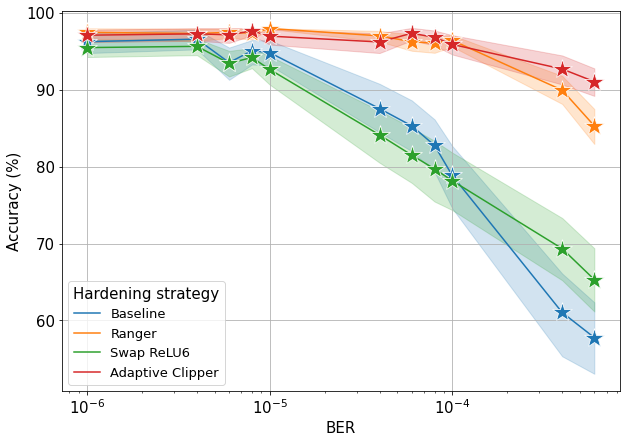

In [7]:
# Baseline_general_report.groupby('ber')['fault_ACC@1'].plot()
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.lineplot(data =total_df,  x='ber', y='fault_ACC@1', hue='Hardening strategy', ax=ax, palette='tab10', marker='*', markersize=20)
ax.grid()
ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_xlabel('BER', fontsize=15)
ax.legend(fontsize=13, title='Hardening strategy', title_fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.set_xscale('log')


In [16]:
total_df['fault_ACC'] = total_df['fault_ACC@1']

In [19]:
total_df.query("fault_ACC < 2e-4")

,goldenf1_1,goldenf1_k,goldenrec_1,goldenrec_k,goldenprec_1,goldenprec_k,fault_f1@1,fault_f1@k,fault_rec@1,fault_rec@k,...,MRRDk,AbsrD,AbsRDk,MRPD,MRPDk,AbsPD,AbsPDk,bit_location,Hardening strategy,fault_ACC


<ipython-input-21-c15458b76c0b>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
<ipython-input-21-c15458b76c0b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


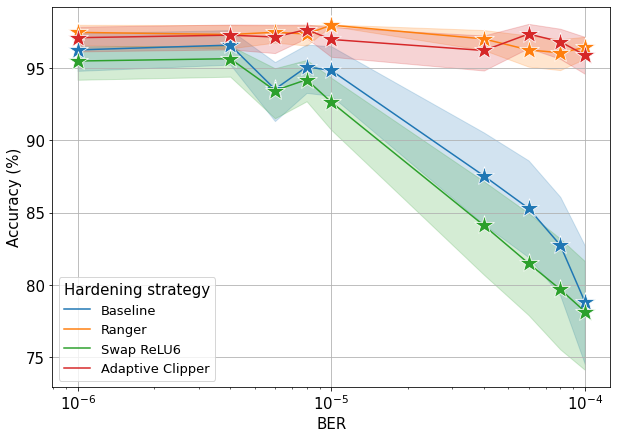

In [21]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.lineplot(data =total_df.query("ber < 2e-4"),  x='ber', y='fault_ACC@1', hue='Hardening strategy', ax=ax, palette='tab10', marker='*', markersize=20)
ax.grid()
ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_xlabel('BER', fontsize=15)
ax.legend(fontsize=13, title='Hardening strategy', title_fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
ax.set_xscale('log')


In [26]:
new_df.rename({'img_Top1_Crit': 'Critical SDC', 'img_Top1_SDC': 'Safe SDC', 'img_Top1_Masked': 'Masked'}, inplace=True)
new_df.to_csv('/home/g.esposito/AlternativeModels-SC2/SC_Fault_injections/report_analysis/img_classification/ber_FI/lenet_FD.csv')

Index(['goldenf1_1', 'goldenf1_k', 'goldenrec_1', 'goldenrec_k',
       'goldenprec_1', 'goldenprec_k', 'fault_f1@1', 'fault_f1@k',
       'fault_rec@1', 'fault_rec@k', 'fault_prec@1', 'fault_prec@k', 'ber',
       'trail', 'induced_error', 'gold_ACC@1', 'gold_ACC@k', 'img_Top1_Crit',
       'img_Top1_SDC', 'img_Top1_Masked', 'fault_ACC@1', 'img_Topk_Crit',
       'img_Topk_SDC', 'img_Topk_Masked', 'fault_ACC@k', 'Class_Top1',
       'Class_Topk', 'MRAD', 'MRADk', 'AbsAD', 'AbsADk', 'MRF1D', 'MRF1Dk',
       'AbsF1D', 'AbsF1Dk', 'MRRD', 'MRRDk', 'AbsrD', 'AbsRDk', 'MRPD',
       'MRPDk', 'AbsPD', 'AbsPDk', 'bit_location', 'fault_ACC'],
      dtype='object')


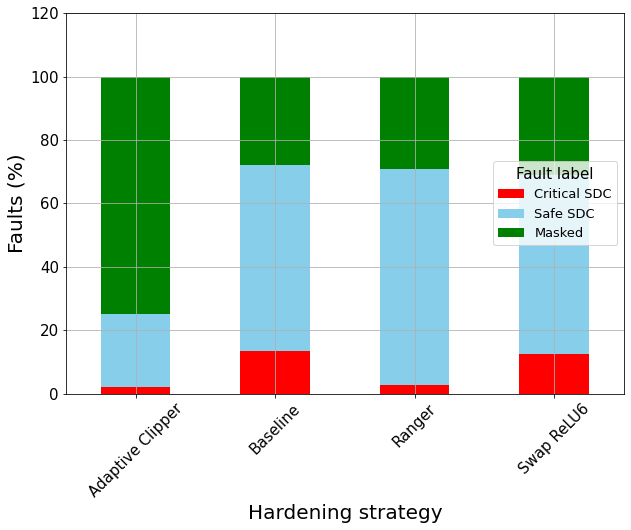

In [22]:
new_df = total_df.groupby('Hardening strategy').mean().reset_index().set_index('Hardening strategy')
print(new_df.columns)
new_df = new_df[['img_Top1_Crit', 'img_Top1_SDC', 'img_Top1_Masked']]
# new_df.plot(kind='bar', stacked=True)
# desired_order = np.array(['Baseline', 'Adaptive Clipper', 'Swap ReLU6', 'Ranger'])
# new_df['Order'] = new_df['Hardening strategy'].map({category: i for i, category in enumerate(desired_order)})
# new_df = new_df.sort_values('Order')


fig, ax = plt.subplots(1,1,figsize=(10,7))
new_df.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'], ax=ax)
# ax.legend(labels=['Critical SDC', 'Safe SDC', 'Masked'], loc='right')
ax.set_xlabel('Hardening strategy', fontsize=20)
ax.grid()
ax.set_xticks(ticks=ax.get_xticks(), labels=new_df.index.unique(),rotation=45, fontsize=15)
ax.set_yticks(ticks=ax.get_yticks(), labels=ax.get_yticklabels(), fontsize=15)
ax.set_ylabel('Faults (%)', fontsize=20)
ax.legend(fontsize=13, title='Fault label', title_fontsize=15, labels=['Critical SDC', 'Safe SDC', 'Masked'], loc='right')

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

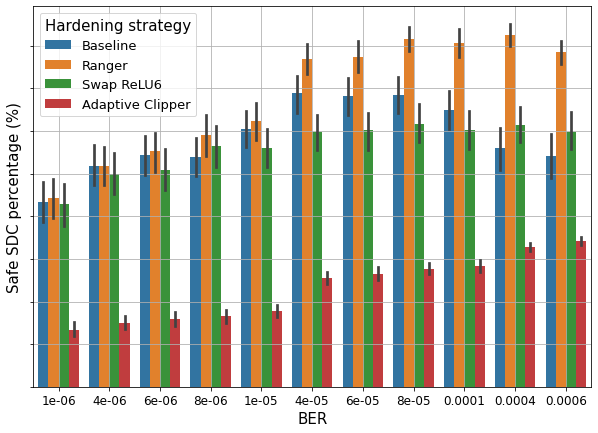

In [42]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.barplot(data=total_df, x='ber', y='img_Top1_SDC', hue='Hardening strategy', ax = ax)
ax.grid()
ax.set_ylabel('Safe SDC percentage (%)', fontsize=15)
ax.set_xlabel('BER', fontsize=15)
ax.legend(fontsize=13, title='Hardening strategy', title_fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

<ipython-input-8-2a83e29d16d9>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)


[Text(0, 0.0, '0'),
 Text(0, 10.0, '10'),
 Text(0, 20.0, '20'),
 Text(0, 30.0, '30'),
 Text(0, 40.0, '40'),
 Text(0, 50.0, '50')]

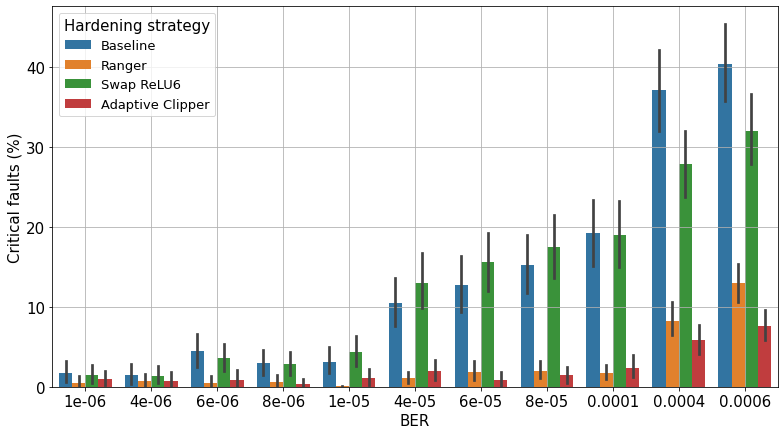

In [8]:
fig, ax = plt.subplots(1,1,figsize=(13,7))
sns.barplot(data=total_df, x='ber', y='img_Top1_Crit', hue='Hardening strategy', ax = ax)
ax.grid()
ax.set_ylabel('Critical faults (%)', fontsize=15)
ax.set_xlabel('BER', fontsize=15)
ax.legend(fontsize=13, title='Hardening strategy', title_fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

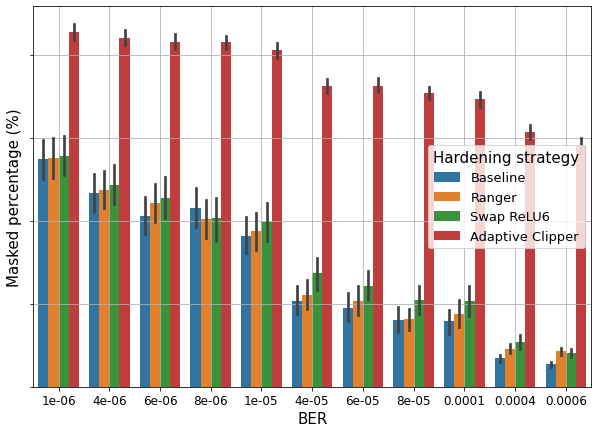

In [39]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.barplot(data=total_df, x='ber', y='img_Top1_Masked', hue='Hardening strategy', ax = ax)
ax.grid()
ax.set_ylabel('Masked percentage (%)', fontsize=15)
ax.set_xlabel('BER', fontsize=15)
ax.legend(fontsize=13, title='Hardening strategy', title_fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)